In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('../data/Mall_Customers.csv',index_col='CustomerID')
data.drop_duplicates(inplace=True)
data.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
# data.isnull().sum()

In [5]:
# using only Spending_Score and income variable for easy visualisation
X = data.iloc[:, [2, 3]].values

In [6]:
# # Using the elbow method to find the optimal number of clusters
# from sklearn.cluster import KMeans
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
#     kmeans.fit(X)
#     # inertia method returns wcss for that model
#     wcss.append(kmeans.inertia_)

In [7]:
# plt.figure(figsize=(10,5))
# sns.lineplot(range(1, 11), wcss,marker='o',color='red')
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

In [8]:
from cluster import Kmeans

In [9]:
obj = Kmeans(X, 3)

In [10]:
center, loss = obj.fit()

In [11]:
y_kmeans, labelled_data = obj.predict(X)

In [12]:
wcss = obj.k_analys()

/Users/qianleren/anaconda3/envs/dissertation/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


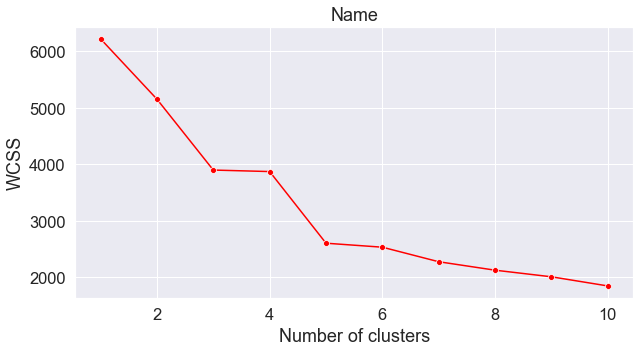

In [13]:
# plot
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('Name')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/Users/qianleren/anaconda3/envs/dissertation/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qianleren/anaconda3/envs/dissertation/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qianleren/anaconda3/envs/dissertation/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

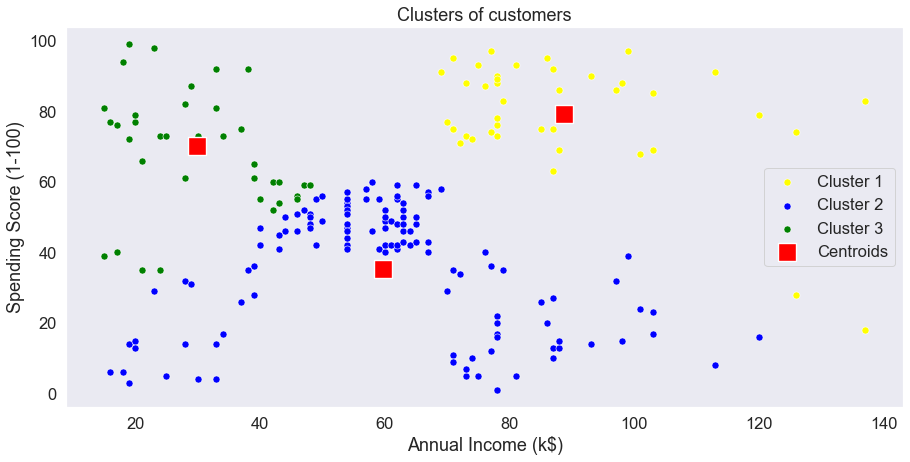

In [14]:
# Visualising the clusters
Z = labelled_data
plt.figure(figsize=(15,7))
sns.scatterplot(Z[y_kmeans == 0, 0], Z[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(Z[y_kmeans == 1, 0], Z[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(Z[y_kmeans == 2, 0], Z[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot([x[0] for x in list(center.values())], [x[1] for x in list(center.values())], 
color = 'red', label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [15]:
# kmeans++
obj = Kmeans(X, 4, centroids='kmeans++')

In [16]:
center, loss = obj.fit()

In [17]:
center

{0: array([48.39215686, 43.31372549]),
 1: array([86.53846154, 82.12820513]),
 2: array([87.43243243, 18.18918919]),
 3: array([25.72727273, 79.36363636])}